In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/ProdigyInfotech/train.zip'
extract_path = '/content/dogs-vs-cats'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipped successfully.")

Unzipped successfully.


In [7]:
import os

image_files = os.listdir('/content/dogs-vs-cats/train')
print(image_files[:10])

['dog.8626.jpg', 'cat.8022.jpg', 'dog.7812.jpg', 'dog.5199.jpg', 'cat.6177.jpg', 'dog.12029.jpg', 'cat.4618.jpg', 'cat.9944.jpg', 'dog.6126.jpg', 'cat.1639.jpg']


In [8]:
import cv2
import numpy as np

X = []
y = []

folder_path = '/content/dogs-vs-cats/train'

for file in os.listdir(folder_path)[:1000]:
    img_path = os.path.join(folder_path, file)

    img = cv2.imread(img_path)
    img = cv2.resize(img, (64, 64))

    X.append(img.flatten())

    if 'cat' in file:
        y.append(0)
    else:
        y.append(1)

X = np.array(X)
y = np.array(y)

print(f'Dataset shape: {X.shape}, Labels shape: {y.shape}')


Dataset shape: (1000, 12288), Labels shape: (1000,)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.495
              precision    recall  f1-score   support

           0       0.47      0.58      0.52        95
           1       0.52      0.42      0.47       105

    accuracy                           0.49       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.50      0.49      0.49       200



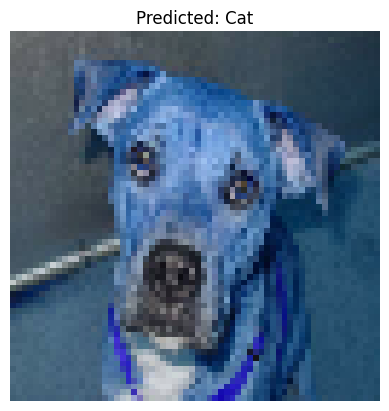

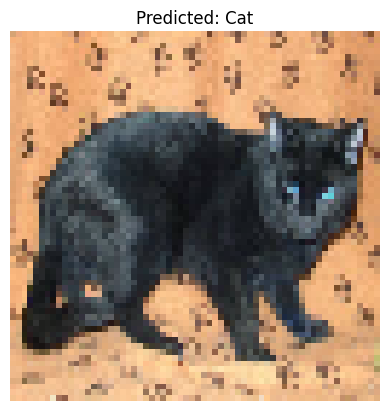

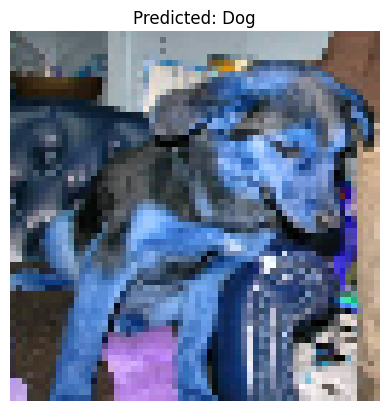

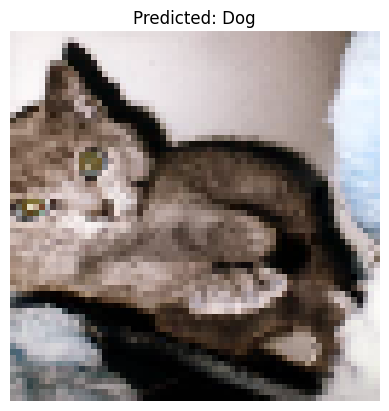

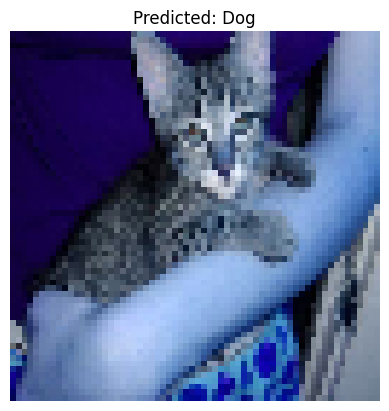

In [13]:
import matplotlib.pyplot as plt

for i in range(5):
    img = X_test[i].reshape(64, 64, 3)
    plt.imshow(img.astype('uint8'))
    plt.title('Predicted: ' + ('Dog' if y_pred[i] == 1 else 'Cat'))
    plt.axis('off')
    plt.show()